# Author: Serafeim Loukas, EPFL

# Example using a 1D dataset

In [16]:
import numpy as np
from scipy.stats import norm
np.random.seed(0)
import matplotlib.pyplot as plt

The number of samples 'n' is: (60,)
(60,)


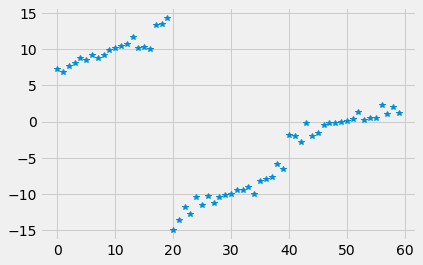

In [17]:
X = np.linspace(-5,5,num=20)
X0 = X*np.random.rand(len(X))+10 # Create data cluster 1
X1 = X*np.random.rand(len(X))-10 # Create data cluster 2
X2 = X*np.random.rand(len(X)) # Create data cluster 3
X_tot = np.stack((X0,X1,X2)).flatten() # Combine the clusters together with the random datapoints from above

print("The number of samples 'n' is: {}".format(X_tot.shape))
_ = plt.plot(X_tot, '*')
print(X_tot.shape)

# Expectation Step

In [18]:
"""Create the array r with dimensionality nxK"""
r = np.zeros((len(X_tot),3))
print('Dimensionality','=',np.shape(r))

"""Instantiate the random gaussians"""
gauss_1 = norm(loc=-5,scale=5)
gauss_2 = norm(loc=8,scale=3)
gauss_3 = norm(loc=1.5,scale=1)

"""Instantiate the random mu_c"""
m = np.array([1/3.,1/3.,1/3.]) # We expect to have three clusters
pi = m / np.sum(m)
print(pi)

('Dimensionality', '=', (60, 3))
[0.33333333 0.33333333 0.33333333]


In [20]:
"""
Probability for each datapoint x_i to belong to gaussian g
"""
for c,g,p in zip(range(3),[gauss_1,gauss_2,gauss_3],pi):
    r[:,c] = p*g.pdf(X_tot)

print(r[:5])

[[1.31865058e-03 4.29842851e-02 8.50229099e-09]
 [1.64172144e-03 4.09214608e-02 1.05449398e-07]
 [1.09981268e-03 4.39739867e-02 9.74733655e-10]
 [8.43424855e-04 4.42814446e-02 3.64416980e-11]
 [5.98402552e-04 4.28772726e-02 4.31977173e-13]]


In [22]:
"""
Normalize the probabilities such that each row of r sums to 1 and
weight it by pi_c == the fraction of points belonging to
cluster c
"""
for i in range(len(r)):
    r[i] = r[i] / (np.sum(pi)*np.sum(r,axis=1)[i])

# Verify
print(np.sum(r,axis=1)) # As we can see, as result each row sums up to one, just as we want it.

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


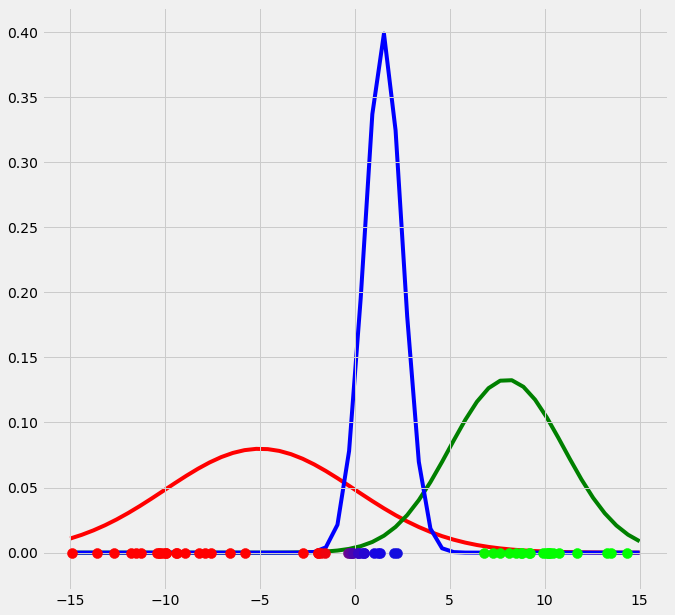

In [23]:
"""Plot the data"""
fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)

for i in range(len(r)):
    ax0.scatter(X_tot[i],0,c=np.array([r[i][0],r[i][1],r[i][2]]),s=100) # first column as red, the second as green and the third as blue

for g,c in zip([gauss_1.pdf(np.linspace(-15,15)),gauss_2.pdf(np.linspace(-15,15)),gauss_3.pdf(np.linspace(-15,15))],['r','g','b']):
    ax0.plot(np.linspace(-15,15),g,c=c,zorder=0)

# Maximization Step

In [24]:
"""calculate m_c"""
m_c = []
for c in range(len(r[0])):
    m = np.sum(r[:,c])
    m_c.append(m) # For each cluster c, calculate the m_c and add it to the list m_c

# OR m_cc = np.sum(r, axis=0)
#print(m_cc)
print(m_c)

"""calculate pi_c"""
pi_c = []
for m in m_c:
    pi_c.append(m/np.sum(m_c)) # For each cluster c, calculate the fraction of points pi_c which belongs to cluster c

# OR pi_cc = m_c / np.sum(m_c)
#print(pi_cc)
#print(pi_c)

"""calculate mu_c"""
mu_c = np.sum(X_tot.reshape(len(X_tot),1)*r,axis=0) / m_c # sum across samples 

"""calculate var_c"""
var_c = []
for c in range(len(r[0])):
    var_c.append((1/m_c[c])*np.dot(((np.array(r[:,c]).reshape(60,1))*(X_tot.reshape(len(X_tot),1) - mu_c[c])).T, (X_tot.reshape(len(X_tot),1) - mu_c[c])))
    
    

[28.193377635768762, 20.18423565857918, 11.622386705652051]


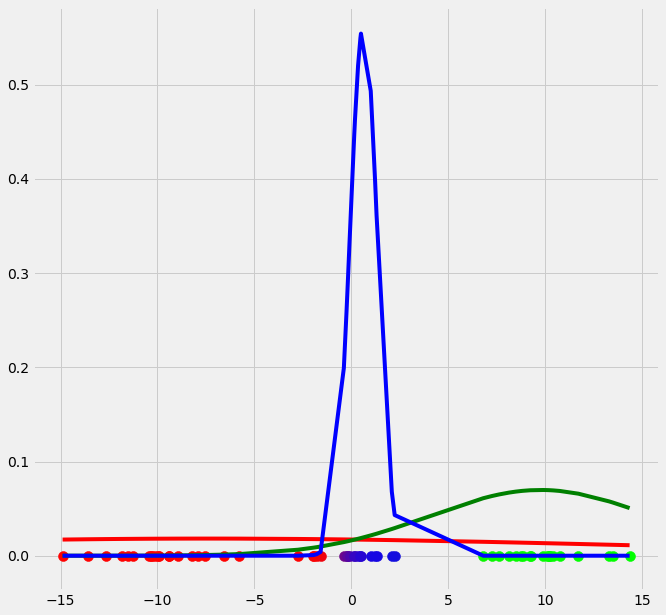

In [25]:
"""Update the gaussians"""
gauss_1 = norm(loc=mu_c[0],scale=var_c[0])
gauss_2 = norm(loc=mu_c[1],scale=var_c[1])
gauss_3 = norm(loc=mu_c[2],scale=var_c[2])

"""Plot the data"""
fig = plt.figure(figsize=(10,10))
ax0 = fig.add_subplot(111)
for i in range(len(r)):
    ax0.scatter(X_tot[i],0,c=np.array([r[i][0],r[i][1],r[i][2]]),s=100)
    
"""Plot the gaussians"""
for g,c in zip([gauss_1.pdf(np.sort(X_tot).reshape(60,1)),gauss_2.pdf(np.sort (X_tot).reshape(60,1)),gauss_3.pdf(np.sort(X_tot).reshape(60,1))], ['r','g','b']):
    ax0.plot(np.sort(X_tot),g,c=c)

# Same but in Object oriented programming format

In [26]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
import numpy as np

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [27]:
from scipy.stats import norm
np.random.seed(0)
X = np.linspace(-5,5,num=20)
X0 = X*np.random.rand(len(X))+15 # Create data cluster 1
X1 = X*np.random.rand(len(X))-15 # Create data cluster 2
X2 = X*np.random.rand(len(X)) # Create data cluster 3
X_tot = np.stack((X0,X1,X2)).flatten() # Combine the clusters to get the random datapoints from above

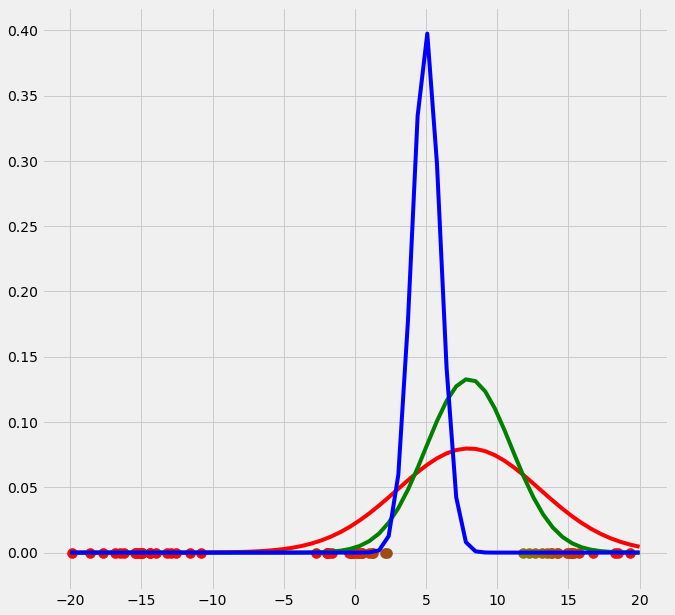

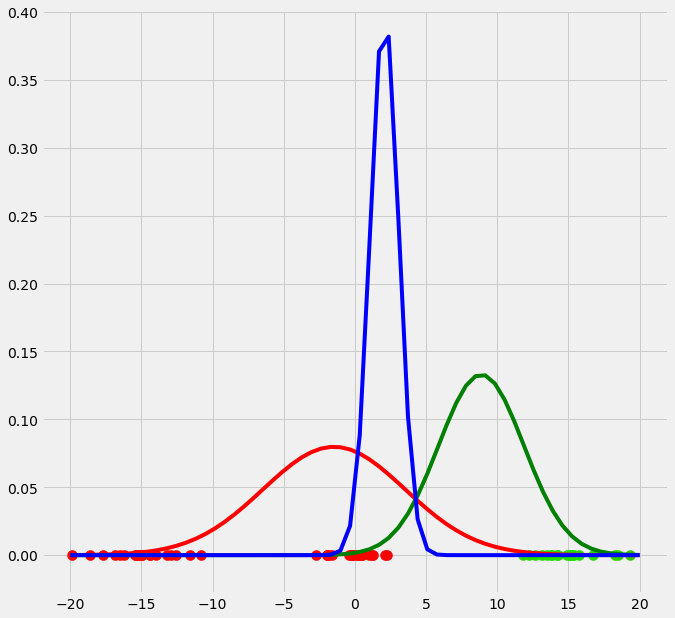

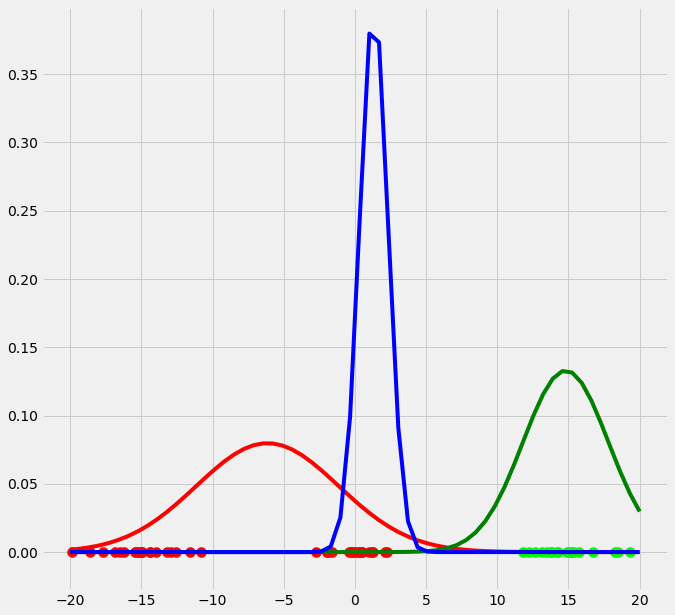

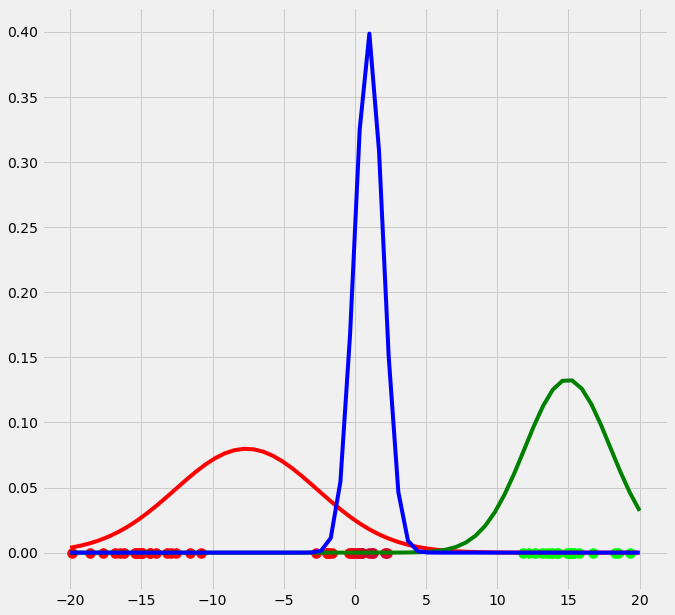

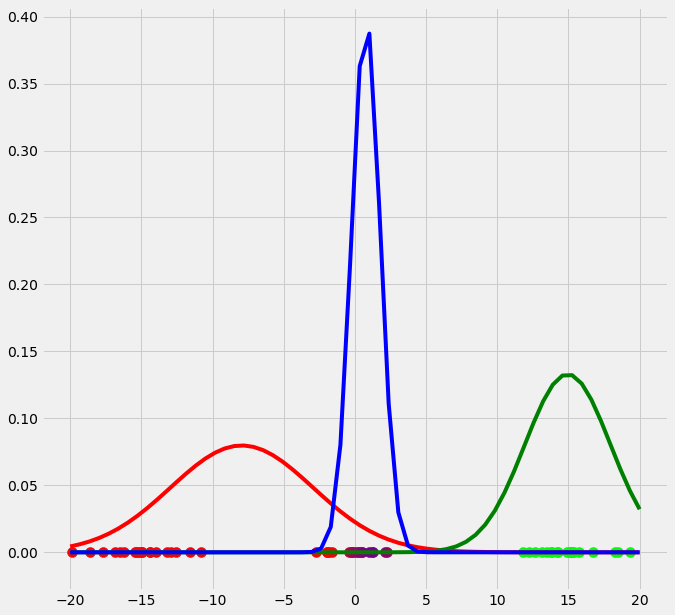

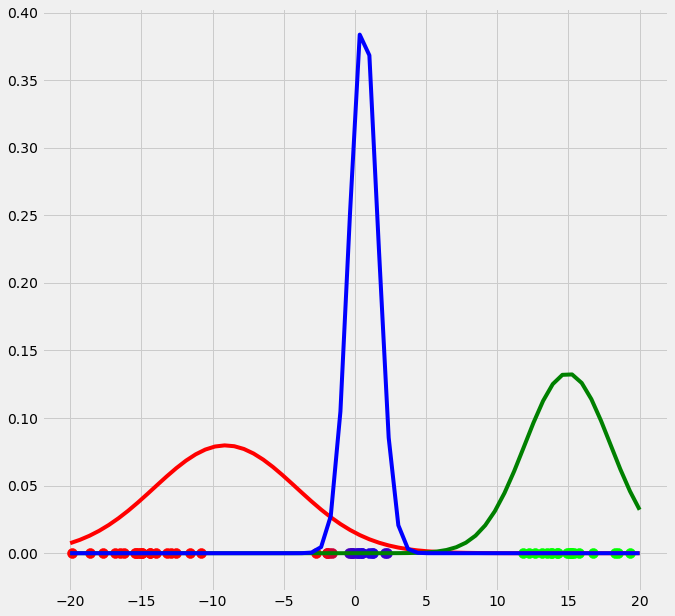

In [28]:
class GM1D():
    
    def __init__(self,X,iterations):
        self.iterations = iterations
        self.X = X
        self.mu = None
        self.pi = None
        self.var = None
    
    def run(self):
    #Instantiate the random mu, pi and var
        self.mu = [8.,8.,5.]
        self.pi = [1/3.,1/3.,1/3.]
        self.var = [5.,3.,1.]

        #EStep
        for iter in range(self.iterations):
            #Create the array r with dimensionality nxK
            r = np.zeros((len(X_tot),3))
 
            #Probability for each datapoint x_i to belong to gaussian g
            for c,g,p in zip(range(3),[norm(loc=self.mu[0],scale=self.var[0]),norm(loc=self.mu[1],scale=self.var[1]),norm(loc=self.mu[2],scale=self.var[2])],self.pi):
                r[:,c] = p*g.pdf(X_tot) # Write the probability that x belongs to gaussian c in column c.
            # Therewith we get a 60x3 array filled with the probability that each x_i belongs to one of the gaussians

        #Normalize the probabilities such that each row of r sums to 1 and weight it by mu_c == the fraction of points
        #belonging to cluster c
            for i in range(len(r)):
                r[i] = r[i]/(np.sum(self.pi)*np.sum(r,axis=1)[i])
    
            #Plot the data
            fig = plt.figure(figsize=(10,10))
            ax0 = fig.add_subplot(111)
            for i in range(len(r)):
                ax0.scatter(self.X[i],0,c=np.array([r[i][0],r[i][1],r[i][2]]),s=100)
            #Plot the gaussians
            for g,c in zip([norm(loc=self.mu[0],scale=self.var[0]).pdf(np.linspace(-20,20 ,num=60)), norm(loc=self.mu[1],scale=self.var[1]).pdf(np.linspace(-20,20,num=60)),norm(loc=self.mu[2],scale=self.var[2]).pdf(np.linspace(-20,20,num=60))],['r','g','b']):
                ax0.plot(np.linspace(-20,20,num=60),g,c=c)

            #MStep    
            #calculate m_c
            m_c = []
            for c in range(len(r[0])):
                m = np.sum(r[:,c])
                m_c.append(m) # For each cluster c, calculate the m_c and add it to the list m_c
        
            #calculate pi_c"""
            for k in range(len(m_c)):
                self.pi[k] = (m_c[k]/np.sum(m_c)) # For each cluster c, calculate the fraction of points pi_c which belongs to cluster c
            
            #calculate mu_c"""
            self.mu = np.sum(self.X.reshape(len(self.X),1)*r,axis=0)/m_c
            
            #calculate var_c"""
            var_c = []
            for c in range(len(r[0])):
                var_c.append((1/m_c[c])*np.dot(((np.array(r[:,c]).reshape(60,1))*(self.X.reshape(len(self.X),1)-self.mu[c])).T,(self.X.reshape(len(self.X),1)-self.mu[c])))
            plt.show()

GM1D = GM1D(X_tot,6)
GM1D.run()

# Example using Multidimensional Dataset

(300, 2)


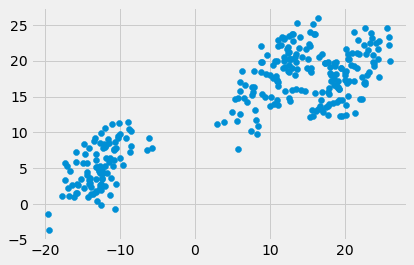

In [29]:
import matplotlib.pyplot as plt
from matplotlib import style
style.use('fivethirtyeight')
from sklearn.datasets.samples_generator import make_blobs
import numpy as np
from scipy.stats import multivariate_normal
# 0. Create dataset
X,Y = make_blobs(cluster_std=1.5,random_state=20,n_samples=300,centers=3)
# Stratch dataset to get ellipsoid data
X = np.dot(X,np.random.RandomState(0).randn(2,2))
print(X.shape)
_ = plt.scatter(X[:,0],X[:,1])

[0.9999783291443392, 2.1660505279434747e-05, 1.0350381419515721e-08]

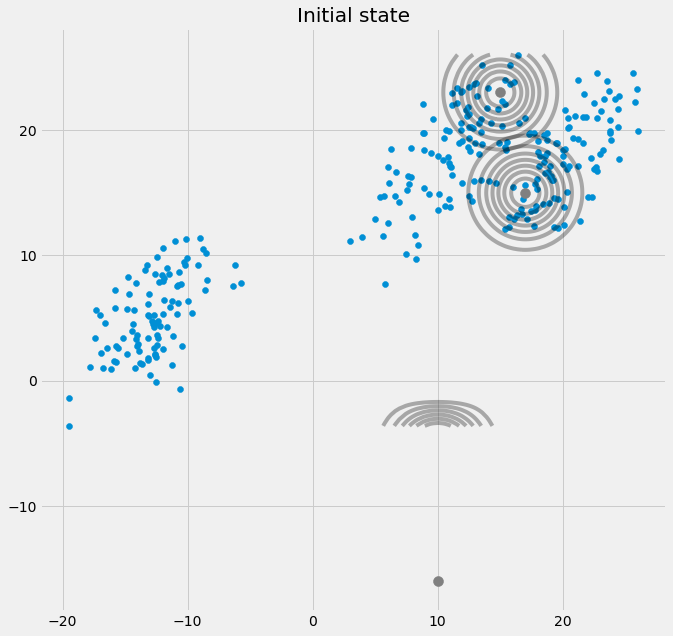

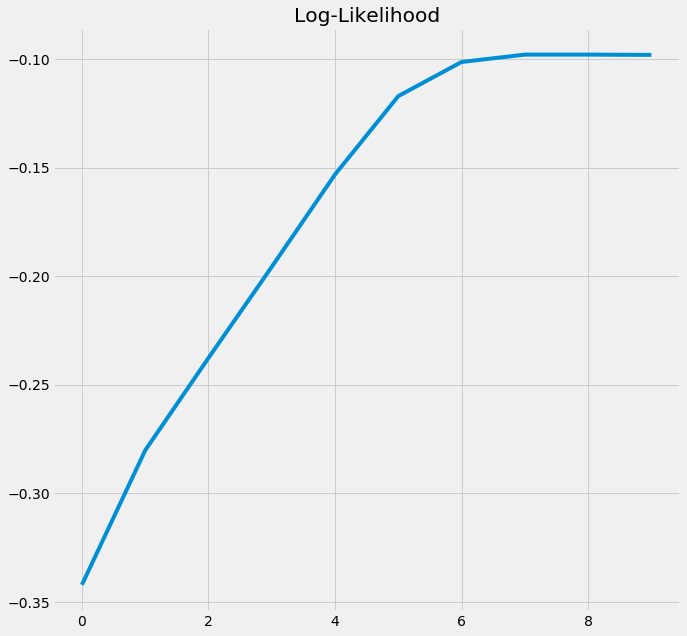

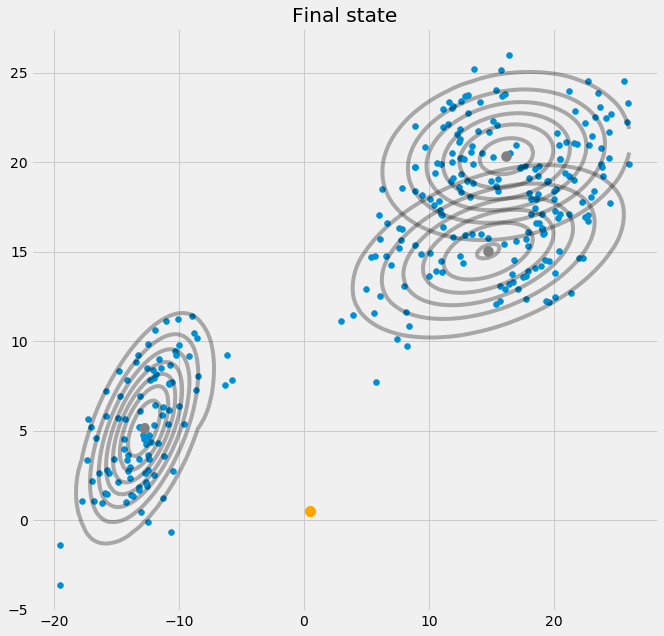

In [32]:
class GMM:
    
    def __init__(self,X,number_of_sources,iterations):
        self.iterations = iterations
        self.number_of_sources = number_of_sources
        self.X = X
        self.mu = None
        self.pi = None
        self.cov = None
        self.XY = None
        
    
    """Define a function which runs for iterations, iterations"""
    def run(self):
        self.reg_cov = 1e-6*np.identity(len(self.X[0]))
        x,y = np.meshgrid(np.sort(self.X[:,0]),np.sort(self.X[:,1]))
        self.XY = np.array([x.flatten(),y.flatten()]).T
        #print(self.reg_cov)
        
        
        """ 1. Set the initial mu, covariance and pi values"""
        self.mu = np.random.randint(min(self.X[:,0]),max(self.X[:,0]),size=(self.number_of_sources,len(self.X[0]))) # This is a nxm matrix since we assume n sources (n Gaussians) where each has m dimensions
        #print(self.mu)
        self.cov = np.zeros((self.number_of_sources,len(X[0]),len(X[0]))) # We need a nxmxm covariance matrix for each source since we have m features --> We create symmetric covariance matrices with ones on the digonal
        #print(self.cov)
        for dim in range(len(self.cov)):
            np.fill_diagonal(self.cov[dim],5)

        self.pi = np.ones(self.number_of_sources)/self.number_of_sources # Are "Fractions"
        log_likelihoods = [] # In this list we store the log likehoods per iteration and plot them in the end to check if we have converged
            
        """Plot the initial state"""    
        fig = plt.figure(figsize=(10,10))
        ax0 = fig.add_subplot(111)
        ax0.scatter(self.X[:,0],self.X[:,1])
        ax0.set_title('Initial state')
        for m,c in zip(self.mu,self.cov):
            c += self.reg_cov
            multi_normal = multivariate_normal(mean=m,cov=c)
            ax0.contour(np.sort(self.X[:,0]),np.sort(self.X[:,1]),multi_normal.pdf(self.XY).reshape(len(self.X),len(self.X)),colors='black',alpha=0.3)
            ax0.scatter(m[0],m[1],c='grey',zorder=10,s=100)
        
        
        ################################################
        for i in range(self.iterations):               
            
            """E Step"""
            r_ic = np.zeros((len(self.X),len(self.cov)))
            
            for m,co,p,r in zip(self.mu,self.cov,self.pi,range(len(r_ic[0]))):
                co+=self.reg_cov
                #print(m)
                mn = multivariate_normal(mean=m,cov=co)
                r_ic[:,r] = p*mn.pdf(self.X)/np.sum([pi_c*multivariate_normal(mean=mu_c,cov=cov_c).pdf(self.X) for pi_c,mu_c,cov_c in zip(self.pi,self.mu,self.cov+self.reg_cov)],axis=0)
                #print(np.array([pi_c*multivariate_normal(mean=mu_c,cov=cov_c).pdf(self.X) for pi_c,mu_c,cov_c in zip(self.pi,self.mu,self.cov+self.reg_cov)]).shape)
            #print(r_ic.shape)
            
            """M Step"""
            # Calculate the new mean vector and new covariance matrices, based on the probable membership of the single x_i to classes c --> r_ic
            self.mu = []
            self.cov = []
            self.pi = []
            log_likelihood = []

            for c in range(len(r_ic[0])):
                m_c = np.sum(r_ic[:,c],axis=0)
                mu_c = (1./m_c)*np.sum(self.X*r_ic[:,c].reshape(len(self.X),1),axis=0)
                self.mu.append(mu_c)
                #print(mu_c)
                # Calculate the covariance matrix per source based on the new mean
                self.cov.append(((1/m_c)*np.dot((np.array(r_ic[:,c]).reshape(len(self.X),1)*(self.X-mu_c)).T,(self.X-mu_c)))+self.reg_cov)
                # Calculate pi_new which is the "fraction of points" respectively the fraction of the probability assigned to each source 
                self.pi.append(m_c/np.sum(r_ic))
            
            #print(np.sum(r_ic))
            #print(self.mu)
            """Log likelihood"""
            log_likelihoods.append(np.log(np.sum([k*multivariate_normal(self.mu[i],self.cov[j]).pdf(X) for k,i,j in zip(self.pi,range(len(self.mu)),range(len(self.cov)))])))

        fig2 = plt.figure(figsize=(10,10))
        ax1 = fig2.add_subplot(111) 
        ax1.set_title('Log-Likelihood')
        ax1.plot(range(0,self.iterations,1),log_likelihoods)
        #plt.show()
    
    """Predict the membership of an unseen, new datapoint"""
    def predict(self,Y):
        # PLot the point onto the fittet gaussians
        fig3 = plt.figure(figsize=(10,10))
        ax2 = fig3.add_subplot(111)
        ax2.scatter(self.X[:,0],self.X[:,1])
        for m,c in zip(self.mu,self.cov):
            multi_normal = multivariate_normal(mean=m,cov=c)
            ax2.contour(np.sort(self.X[:,0]),np.sort(self.X[:,1]),multi_normal.pdf(self.XY).reshape(len(self.X),len(self.X)),colors='black',alpha=0.3)
            ax2.scatter(m[0],m[1],c='grey',zorder=10,s=100)
            ax2.set_title('Final state')
            for y in Y:
                ax2.scatter(y[0],y[1],c='orange',zorder=10,s=100)
        prediction = []        
        for m,c in zip(self.mu,self.cov):  
            #print(c)
            prediction.append(multivariate_normal(mean=m,cov=c).pdf(Y)/np.sum([multivariate_normal(mean=mean,cov=cov).pdf(Y) for mean,cov in zip(self.mu,self.cov)]))
        #plt.show()
        return prediction
         
    
    
GMM = GMM(X,3,10)     
GMM.run()
GMM.predict([[0.5,0.5]])